# **FINAL PROJECT 1** - Linear Regression

Kelompok 5 - PYTN 013
- Muhammad Naufal Misbahuddin
- Nayla Salsabila Cindiva Utomo Putri
- Nabila Regitasyari Irmawan

# A. Perkenalan

Uber dan Lyft merupakan penyedia jasa Taxi online yang banyak digunakan khususnya di Boston, USA. Pada Final Project Pertama ini kami dari kelompok 5 mencoba untuk memprediksi peluang pengguna memilih lyft daripada uber yang dipengaruhi oleh harga/price, distance/jarak, dan juga surge multiplier/lonjakan harga.

Dari dataset yang berasal dari platform kaggle yang bertajuk "Uber and Lyft Dataset Boston, MA" yang berisi 57 atribut denga data yang berjumlah 693071 kami mencoba menyederhanakannya agar tujuan dari prediksi yang akan kami buat sesuai (price, distance, surge_multiplier). 

Objektivitas berkutat pada atribut cab_type yang dipengaruhi price, distance, dan juga surge_multiplier dengan model yang sesuai dengan ketentuan pada final project pertama ini.

# B. Import Library yang dibutuhkan

In [ ]:
#Data Processing
import pandas as pd
import numpy as np
from datetime import date
#Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
#Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# C. Data Loading

In [ ]:
ride_share_data = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max_columns',None)
#Melihat 5 data teratas
ride_share_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1.544969e+09,27.39,1.545044e+09,partly-cloudy-night,32.70,1021.98,57.0,0.72,0.0,10.000,303.8,1.544962e+09,1.544995e+09,0.30,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1.543252e+09,36.20,1.543291e+09,rain,41.83,1003.97,90.0,1.00,0.0,4.786,291.1,1.543233e+09,1.543267e+09,0.64,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1.543320e+09,29.11,1.543392e+09,clear-night,31.10,992.28,240.0,0.03,0.0,10.000,315.7,1.543319e+09,1.543353e+09,0.68,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1.543511e+09,26.20,1.543576e+09,clear-night,26.64,1013.73,310.0,0.00,0.0,10.000,291.1,1.543492e+09,1.543526e+09,0.75,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1.543421e+09,30.29,1.543460e+09,partly-cloudy-night,28.61,998.36,303.0,0.44,0.0,10.000,347.7,1.543406e+09,1.543440e+09,0.72,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [ ]:
#Melihat Dimensi Data
ride_share_data.shape

(595454, 57)

In [ ]:
#Melihat Informasi data
ride_share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595454 entries, 0 to 595453
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           595454 non-null  object 
 1   timestamp                    595454 non-null  float64
 2   hour                         595454 non-null  int64  
 3   day                          595454 non-null  int64  
 4   month                        595454 non-null  int64  
 5   datetime                     595454 non-null  object 
 6   timezone                     595454 non-null  object 
 7   source                       595454 non-null  object 
 8   destination                  595454 non-null  object 
 9   cab_type                     595454 non-null  object 
 10  product_id                   595454 non-null  object 
 11  name                         595454 non-null  object 
 12  price                        548189 non-null  float64
 13 

**Analisis** 

Dari sini kita bisa melihat bahwa terdapat 11 data bertipe kategorikal dan 46 data bertipe numerikal. Ada yang janggal karena tidak ada data yang missing values. kita akan melakukan pengelompokan terlebih dahulu kemudian akan mengecek data yang missing values.


 

## Mengelompokan Data antara Numerikal dan Kategorikal

In [ ]:
numerical = list(ride_share_data.select_dtypes(include=['float64']).columns.values) + list(ride_share_data.select_dtypes(include=['int64']).columns.values)
kategorikal = list(ride_share_data.select_dtypes(include=['object']).columns.values)

In [ ]:
#Melihat kolom numerical
numerical

['timestamp',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'visibility',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'hour',
 'day',
 'month',
 'windGustTime',
 'temperatureHighTime',
 'temperatureLowTime']

In [ ]:
#Melihat Kolom Kategorikal
kategorikal

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

## Melihat statistik deskriptif kolom numerikal

In [ ]:
ride_share_data[numerical].describe()

,timestamp,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,hour,day,month,windGustTime,temperatureHighTime,temperatureLowTime
count,5.954540e+05,548189.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595454.000000,595453.000000,5.954530e+05,595453.000000,5.954530e+05,595453.000000,595453.000000,595453.000000,595453.000000,595453.000000,595453.000000,595453.000000,5.954530e+05,5.954530e+05,595453.000000,595453.000000,5.954530e+05,595453.000000,5.954530e+05,595453.000000,5.954530e+05,595453.000000,5.954530e+05,595453.000000,5.954530e+05,595454.000000,595454.000000,595454.000000,5.954540e+05,5.954540e+05,5.954540e+05
mean,1.544045e+09,16.546423,2.189443,1.013935,42.338161,-71.066129,39.571885,35.867645,0.008926,0.145559,0.740929,6.186218,8.464470,8.473411,45.028493,34.144156,41.599102,1.544050e+09,30.128834,1.544098e+09,31.638578,1010.104965,220.059993,0.686169,0.248764,8.473409,313.530516,1.544027e+09,1.544060e+09,0.578703,0.037342,1.544044e+09,33.450188,1.544041e+09,45.246916,1.544047e+09,29.723707,1.544048e+09,41.979051,1.544048e+09,11.617903,17.823706,11.585535,1.544048e+09,1.544049e+09,1.544102e+09
std,6.893266e+05,9.328313,1.140407,0.091999,0.047868,0.020287,6.719017,7.899811,0.026946,0.328495,0.138426,3.145722,5.277567,2.598714,5.987402,6.377974,7.650563,6.943488e+05,8.046598,6.929149e+05,9.126255,13.481178,99.123984,0.358685,0.474249,2.598716,27.919966,6.913106e+05,6.908345e+05,0.244663,0.055214,6.913742e+05,6.471142,6.903267e+05,5.638989,6.903235e+05,7.106228,6.873325e+05,6.927224,6.912824e+05,6.951875,9.974253,0.492630,6.929780e+05,6.939668e+05,6.924533e+05
min,1.543204e+09,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,0.717000,32.680000,17.850000,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09,0.000000,1.000000,11.000000,1.543151e+09,1.543154e+09,1.543234e+09
25%,1.543444e+09,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,8.432000,42.570000,30.170000,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09,6.000000,13.000000,11.000000,1.543432e+09,1.543439e+09,1.543489e+09
50%,1.543736e+09,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,9.880000,44.660000,34.180000,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.220000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09,12.000000,17.000000,12.000000,1.543756e+09,1.543788e+09,1.543817e+09
75%,1.544827e+09,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,40.010000,0.000000,0.000000,0.880000,8.410000,11.740000,9.996000,46.910000,38.730000,44.090000,1.544818e+09,35.320000,1.544836e+09,38.120000,1021.860000,303.000000,1.000000,0.0

## Grouping data berdasarkan cab_type(uber/lyft)

In [ ]:
ride_share_data.groupby('cab_type').count()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
cab_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lyft,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264875,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874,264874
Uber,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,283314,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579,330579


# D. Data Cleaning 

## Mengecek Terlebih dahulu missing values


In [ ]:
ride_share_data = ride_share_data.sort_values('datetime')
ride_share_data = ride_share_data[['id','timestamp','hour','day','month','datetime','source','destination','cab_type','product_id','name','price','distance','surge_multiplier','temperature','short_summary','long_summary','icon','visibility','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','latitude','longitude']]
ride_share_data.head()

,id,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,long_summary,icon,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,latitude,longitude
276564,90e22612-d1c7-47c2-af54-2a2240109889,1.543204e+09,3,26,11,2018-11-26 03:40:46,Beacon Hill,North End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,17.5,2.19,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003
325884,10108e81-fe92-4620-9e83-b7dd543a2ca8,1.543204e+09,3,26,11,2018-11-26 03:40:46,Fenway,Theatre District,Lyft,lyft_plus,Lyft XL,16.5,2.96,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003
276566,cec0651f-2280-48ac-86bf-cb0152cada9e,1.543204e+09,3,26,11,2018-11-26 03:40:46,Beacon Hill,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,2.19,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003
325885,52d51d09-725b-4f57-b866-382c152cdb92,1.543204e+09,3,26,11,2018-11-26 03:40:46,Fenway,Theatre District,Lyft,lyft,Lyft,11.0,2.96,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003
261363,f3f35cea-9a3f-4534-930d-da42e7610f77,1.543204e+09,3,26,11,2018-11-26 03:40:46,Beacon Hill,Boston University,Lyft,lyft_premier,Lux,16.5,2.30,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003


In [ ]:
ride_share_data.isna().any()

id                         False
timestamp                  False
hour                       False
day                        False
month                      False
datetime                   False
source                     False
destination                False
cab_type                   False
product_id                 False
name                       False
price                       True
distance                   False
surge_multiplier           False
temperature                False
short_summary              False
long_summary               False
icon                        True
visibility                 False
temperatureHigh            False
temperatureLow             False
apparentTemperatureHigh     True
apparentTemperatureLow      True
latitude                   False
longitude                  False
dtype: bool

In [ ]:
ride_share_data.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                      47265
distance                       0
surge_multiplier               0
temperature                    0
short_summary                  0
long_summary                   0
icon                           1
visibility                     0
temperatureHigh                0
temperatureLow                 0
apparentTemperatureHigh        1
apparentTemperatureLow         1
latitude                       0
longitude                      0
dtype: int64

In [ ]:
ride_share_data['price'] = ride_share_data['price'].fillna(ride_share_data['distance']*1.45)

In [ ]:
ride_share_data['source'].value_counts()

Financial District         50805
Boston University          49985
Fenway                     49751
North End                  49676
Haymarket Square           49629
Theatre District           49515
Back Bay                   49512
West End                   49476
South Station              49445
Beacon Hill                49371
Northeastern University    49246
North Station              49043
Name: source, dtype: int64

In [ ]:
ride_share_data['destination'].value_counts()

Financial District         50683
Fenway                     50044
Boston University          49795
Theatre District           49717
South Station              49679
Haymarket Square           49600
Back Bay                   49537
North End                  49455
West End                   49403
North Station              49261
Northeastern University    49149
Beacon Hill                49131
Name: destination, dtype: int64

In [ ]:
ride_share_data['datetime'] = pd.to_datetime(ride_share_data['datetime'])
type(ride_share_data['datetime'])

pandas.core.series.Series

In [ ]:
ride_share_data['days name']=ride_share_data['datetime'].dt.day_name()

## Menghapus kolom yang tidak digunakan

In [ ]:
ride_share_data = ride_share_data[['cab_type','product_id','price','distance','surge_multiplier']]

#Melihat informasi data yang akan digunakan
ride_share_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595454 entries, 276564 to 204553
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          595454 non-null  object 
 1   product_id        595454 non-null  object 
 2   price             595454 non-null  float64
 3   distance          595454 non-null  float64
 4   surge_multiplier  595454 non-null  float64
dtypes: float64(3), object(2)
memory usage: 27.3+ MB


In [ ]:
#Melihat lima data teratas dari data yang akan digunakan
ride_share_data.head()

,cab_type,product_id,price,distance,surge_multiplier
276564,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,17.5,2.19,1.0
325884,Lyft,lyft_plus,16.5,2.96,1.0
276566,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,13.0,2.19,1.0
325885,Lyft,lyft,11.0,2.96,1.0
261363,Lyft,lyft_premier,16.5,2.30,1.0


In [ ]:
#Deskriptif kolom numerikal dari data yang akan digunakan
ride_share_data.describe()

,price,distance,surge_multiplier
count,595454.000000,595454.000000,595454.000000
mean,15.485130,2.189443,1.013935
std,9.664695,1.140407,0.091999
min,0.029000,0.020000,1.000000
25%,8.500000,1.280000,1.000000
50%,13.500000,2.160000,1.000000
75%,22.500000,2.930000,1.000000
max,92.000000,7.620000,3.000000


In [ ]:
#Deskriptif kolom kategorik dari data yang akan digunakan
ride_share_data.describe(include='object')

,cab_type,product_id
count,595454,595454
unique,2,13
top,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a
freq,330579,47265


In [ ]:
#Jumlah pengguna uber vs lyft berdasarkan setiap tipe produk
ride_share_data.product_id.value_counts()

8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    47265
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    47243
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    47227
997acbb5-e102-41e1-b155-9df7de0a73f2    47219
6c84fd89-3f11-4782-9b50-97c468b19529    47218
6d318bcc-22a3-4af6-bddd-b409bfce1546    47204
55c66225-fbe7-4fd5-9072-eab1ece5e23e    47203
lyft_luxsuv                             44158
lyft_lux                                44147
lyft                                    44144
lyft_line                               44143
lyft_premier                            44142
lyft_plus                               44141
Name: product_id, dtype: int64

In [ ]:
ride_share_data.query('product_id=="6d318bcc-22a3-4af6-bddd-b409bfce1546"')

,cab_type,product_id,price,distance,surge_multiplier
349435,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,27.5,2.66,1.0
302977,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,26.0,0.61,1.0
449959,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,28.5,2.50,1.0
15204,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,33.0,2.30,1.0
78954,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,29.5,2.46,1.0
...,...,...,...,...,...
593092,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,27.5,2.46,1.0
465427,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,27.0,1.03,1.0
166552,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,33.0,2.30,1.0
204552,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,27.5,1.16,1.0


In [ ]:
ride_share_data.query('product_id=="lyft_lux"')

,cab_type,product_id,price,distance,surge_multiplier
546625,Lyft,lyft_lux,62.5,4.46,1.75
184335,Lyft,lyft_lux,19.5,1.23,1.00
184336,Lyft,lyft_lux,16.5,1.18,1.00
325880,Lyft,lyft_lux,27.5,3.06,1.00
400864,Lyft,lyft_lux,32.5,4.52,1.00
...,...,...,...,...,...
222473,Lyft,lyft_lux,27.5,2.98,1.00
343020,Lyft,lyft_lux,16.5,1.14,1.00
564634,Lyft,lyft_lux,22.5,2.40,1.00
109814,Lyft,lyft_lux,34.0,4.40,1.00


# E. Eksplorasi Data

## Visualisasi Data Numerik
1. Visualisasi distribusi tarif perjalanan menggunakan histogram

<ipython-input-25-ab180877a145>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


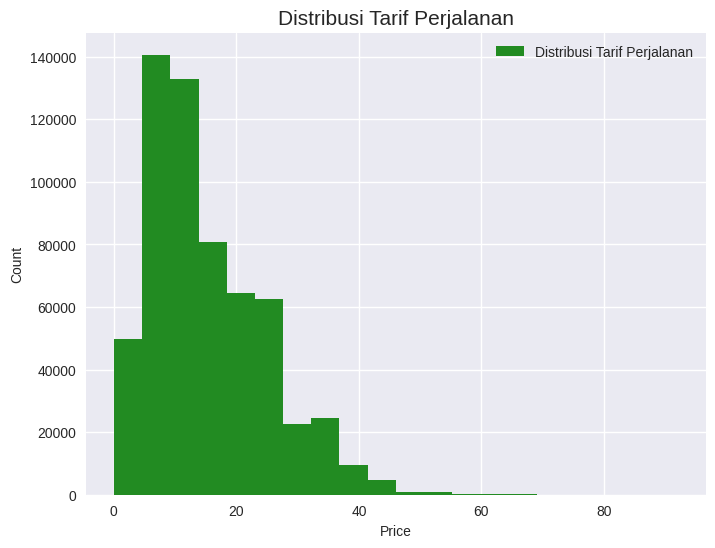

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.hist(ride_share_data['price'],20,color='forestgreen')
plt.title('Distribusi Tarif Perjalanan',size=15)
plt.xlabel('Price',size=10)
plt.ylabel('Count',size=10)
plt.grid(True)
plt.legend(['Distribusi Tarif Perjalanan'],loc=0)
plt.show()

**Analisis**

Berdasarkan visualisasi histogram dari distribusi tarif perjalanan, didapatkan bahwa tarif perjalanan dari pengguna taxi lyft dan uber paling banyak berorientasi pada range harga 5 - 35

2. Visualisasi jumlah data durasi perjalanan

<ipython-input-26-3b1f4225de84>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


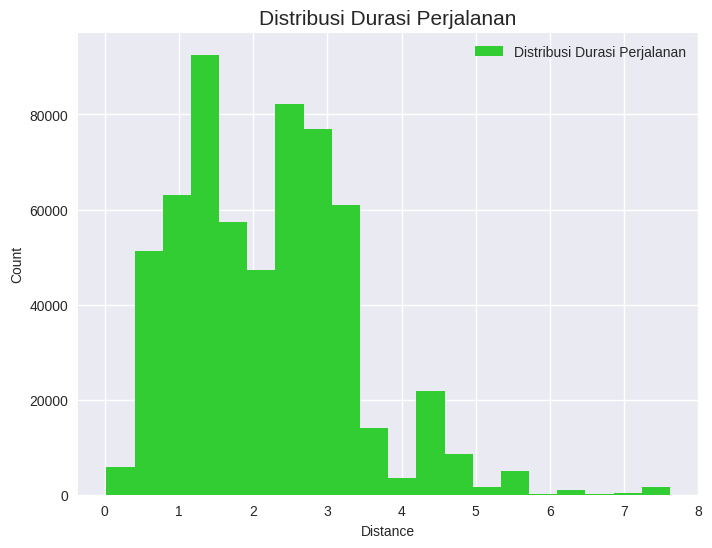

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.hist(ride_share_data['distance'],20,color='limegreen')
plt.title('Distribusi Durasi Perjalanan',size=15)
plt.xlabel('Distance',size=10)
plt.ylabel('Count',size=10)
plt.grid(True)
plt.legend(['Distribusi Durasi Perjalanan'],loc=0)
plt.show()

**Analisis**

Berdasarkan visualisasi histogram dari jaraki perjalanan, didapatkan bahwa jarak perjalanan dari pengguna taxi lyft dan uber paling banyak berorientasi pada angka 1-3

## Visualisasi Data Kategorik
1. Visualisasi rata-rata harga uber dan lyft berdasarkan setiap tipe produk

In [ ]:
ride_share_data.groupby(['cab_type', 'product_id']).mean()['price']

cab_type  product_id                          
Lyft      lyft                                     9.611412
          lyft_line                                6.029971
          lyft_lux                                23.071697
          lyft_luxsuv                             32.325789
          lyft_plus                               15.314168
          lyft_premier                            17.774149
Uber      55c66225-fbe7-4fd5-9072-eab1ece5e23e     9.761244
          6c84fd89-3f11-4782-9b50-97c468b19529    20.517430
          6d318bcc-22a3-4af6-bddd-b409bfce1546    30.283069
          6f72dfc5-27f1-42e8-84db-ccc7a75f6969    15.674741
          8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a     3.176040
          997acbb5-e102-41e1-b155-9df7de0a73f2     8.748375
          9a0e7b09-b92b-4c41-9779-2ad22b4d779d     9.761192
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

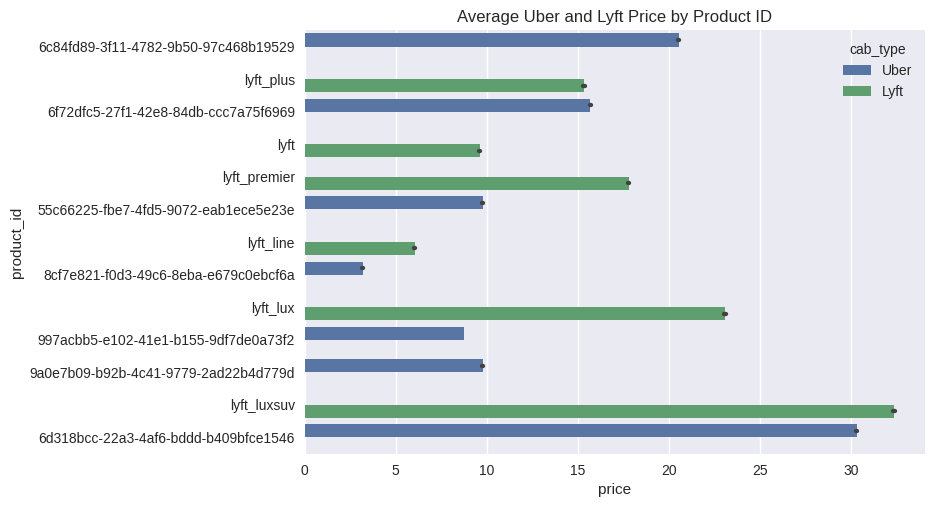

In [ ]:
sns.barplot(data=ride_share_data, x="price",y="product_id", hue="cab_type")
plt.title('Average Uber and Lyft Price by Product ID')
plt.show

**Analisis**

Berdasarkan visualisasi barplot dari rata-rata harga uber dan lyft berdasarkan tipe produk, didapatkan bahwa taxi lyft_luxsuv memiliki rata-rata harga paling mahal jika dibandingkan dengan tipe taxi lyft lainnya, dan rata-rata harga paling murah dari taxi lyft terdapat pada taxi lyft_line. Sedangkan, pada taxi uber 6d318bcc-22a3-4af6-bddd-b409bfce1546 merupakan tipe yang memiliki rata-rata harga paling mahal dan tipe 8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a dengan rata-rata harga paling murah.

2. Visualisasi Jumlah Pengguna Uber dan Lyft

In [ ]:
cabtype_count = ride_share_data['cab_type'].value_counts()
cabtype_count

Uber    330579
Lyft    264875
Name: cab_type, dtype: int64

Text(0.5, 1.0, 'Total Each Type of Cab')

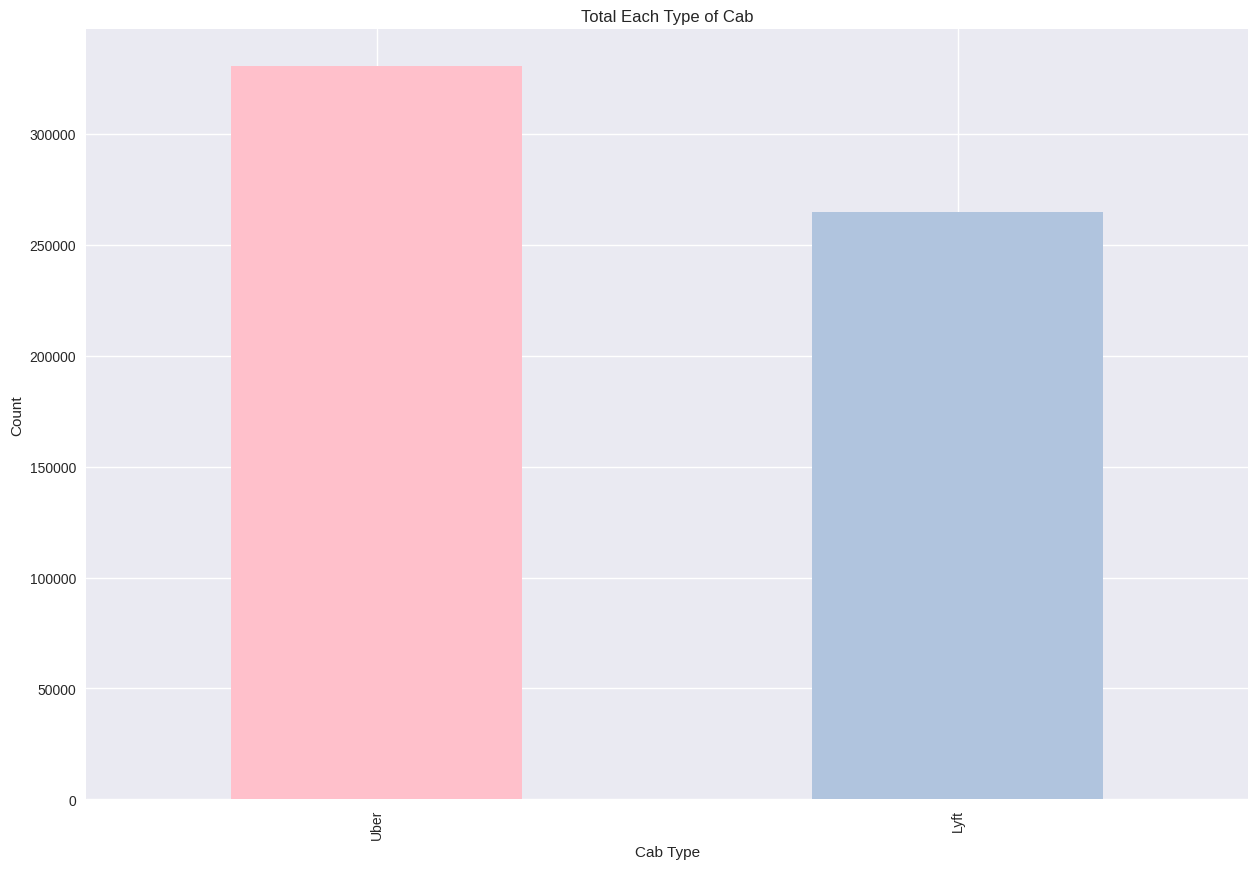

In [ ]:
cabtype_count.plot(kind='bar', figsize=(15,10), color=['pink', 'lightsteelblue'])

plt.xlabel('Cab Type')  
plt.ylabel('Count')  
plt.title('Total Each Type of Cab')

**Analisis**

Berdasarkan visualisasi dari jumlah pengguna setiap taxi, didapatkan bahwa taxi uber memiliki jumlah pengguna lebih besar, yaitu sebanyak 385663 pengguna, sedangkan taxi lyft memiliki 307408 pengguna.

# F. Data Preprocessing

In [ ]:
#Memilih data yang akan digunakan untuk modelling
data_modelling = ride_share_data[['cab_type','price','distance','surge_multiplier']]

#Melihat informasi data yang akan digunakan
data_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595454 entries, 276564 to 204553
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          595454 non-null  object 
 1   price             595454 non-null  float64
 2   distance          595454 non-null  float64
 3   surge_multiplier  595454 non-null  float64
dtypes: float64(3), object(1)
memory usage: 22.7+ MB


## Melakukan Encoding Data

In [ ]:
#Encoding Data
data_modelling = pd.get_dummies(data_modelling)
data_modelling.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
276564,17.5,2.19,1.0,0,1
325884,16.5,2.96,1.0,1,0
276566,13.0,2.19,1.0,0,1
325885,11.0,2.96,1.0,1,0
261363,16.5,2.30,1.0,1,0


## Menentukan variabel prediktor dan variabel respon

In [ ]:
#Predictors
X = data_modelling[['price','distance','surge_multiplier']]

#Respons
y = data_modelling['cab_type_Lyft']

## Korelasi antara variabel prediktor dengan variabel respon

<Axes: >

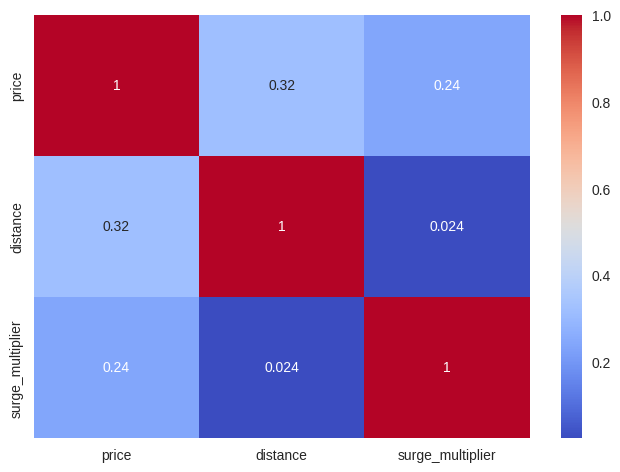

In [ ]:
#Menghitung matriks korelasi
correlation_matrix = X.corr()

#Visualisasi matriks korelasi menggunakan heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
#Menampilkan korelasi antara variabel prediktor dan variabel respon
correlation_with_target = X.corrwith(y)
print("Korelasi dengan variabel respon:")
print(correlation_with_target)

Korelasi dengan variabel respon:
price               0.173225
distance           -0.001205
surge_multiplier    0.169218
dtype: float64


**Analisis**

Berdasarkan hasil korelasi varibel prediktor dengan variabel respon, didapatkan informasi sebagai berikut:

* Korelasi antara price dan cab_type_lyft menghasilkan nilai positif, artinya terdapat hubungan positif antara keduanya. Sehingga, semakin tinggi nilai price, kemungkinan nilai cab_type_lyft juga meningkat.
* Korelasi antara distance dan cab_type_lyft menghasilkan nilai negatif, artinya terdapat hubungan yang lemah antara keduanya dan menunjukkan kecenderungan bahwa semakin jauh jaraknya, kemungkinan semakin sedikit pengguna taxi lyft.
* Korelasi antara surge_multiplier dan cab_type_lyft menghasilkan nilai positif, artinya terdapat hubungan positif antara keduanya. Sehingga, semakin tinggi nilai surge_multiplier, kemungkinan nilai cab_type_lyft juga meningkat.

## Mengecek Multikolinearitas pada Variabel Prediktor

In [ ]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Menghitung VIF untuk variabel prediktor
vif_prediktor = calculate_vif(X)

# Menampilkan hasil VIF untuk variabel prediktor
print(vif_prediktor)

            Feature       VIF
0             price  4.132995
1          distance  5.056096
2  surge_multiplier  5.873394


**Analisis**

Berdasarkan hasil analisis multikolinearitas, didapatkan bahwa ketiga variabel prediktor memiliki nilai VIF di bawah angka 5. Artinya, tidak ada tanda multikolinearitas dan pemodelan dapat dilanjutkan.

## Data Latih dan Data Uji 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# G. Pendefinisian Model
Menggunakan metode _Logistic Regression Model, K-Nearest Neighbors, Decision Tree, Random Forest, dan Naive Bayes_, kami berharap mendapatkan output untuk membantu menemukan probabilitas Sehingga, variabel respon yang kami gunakan memiliki tipe kategorik, dengan y=1 mengartikan pengguna menggunakan jasa taxi lyft dan y=0 mengartikan pengguna menggunakan jas ataxi uber.

Parameter yang kami gunakan adalah harga (price), jarak (distance), dan lonjakan harga (surge_multiplier).

Kami juga akan melakukan pemodelan menggunakan metode lainnya untuk mendapatkan model terbaik dari output yang diharapkan.

## Logistic Regression Model

In [ ]:
model_logit = LogisticRegression()

## K-Nearest Neighbors

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)

## Support Vector Machine Model


In [ ]:
model_svm = SVR()

## Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier()

## Random Forest

In [ ]:
model_rf = RandomForestRegressor()

## Naive Bayes

In [ ]:
model_nb = GaussianNB()

# H. Pelatihan Model & I  Evaluasi Model

## Logistic Regression Model

In [ ]:
#Melatih data model
model_logit.fit(X_train, y_train)

print('Intercept:', model_logit.intercept_)
print('Coefficients: ', model_logit.coef_)

Intercept: [-18.84604376]
Coefficients:  [[ 0.03443896 -0.10195141 18.25204706]]


**Analisis**

Berdasarkan hasil pelatihan model diatas, didapatkan nilai log-odds ketika semua variabel prediktor memiliki nilai 0 sebesar -19.39694584. Selain itu juga didapatkan nilai koefisien setiap variabel prediktor, dengan interpretasi sebagai berikut:

* Setiap kenaikan angka harga (price), maka akan meningkatkan probabilitas pengguna memilih lyft sebesar 0.03446727
* Setiap kenaikan angka jarak (distance), maka akan menurunkan probabilitas pengguna memilih lyft sebesar -0.10075006
* Setiap kenaikan angka surge_multiplier (lonjakan harga), maka akan meningkatkan probabilitas pengguna memilih lyft sebesar 18.79647255

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_logit = model_nb.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_logit = mean_squared_error(y_test, y_pred_logit, squared=False)

In [ ]:
#Menghitung MAE
mae_logit = mean_absolute_error(y_test, y_pred_logit)

In [ ]:
# Menghitung akurasi model
accuracy_logit = accuracy_score(y_test, y_pred_logit)

In [ ]:
# Menampilkan hasil evaluasi
print('Accuracy:', accuracy_logit)
print('RMSE:', rmse_logit)
print('MAE:', mae_logit)
print('Classification Report:')
print(classification_report(y_test, y_pred_logit))

Accuracy: 0.585069162603492
RMSE: 0.6441512535084505
MAE: 83.59194343836943
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.84      0.69     99104
           1       0.57      0.26      0.36     79533

    accuracy                           0.59    178637
   macro avg       0.58      0.55      0.53    178637
weighted avg       0.58      0.59      0.55    178637



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar 0.5846326988005117, artinya model mampu melakukan prediksi yang benar sekitar 58.46% dari total data.
* RMSE sebesar 0.6444899543045557 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 83.51429863121747 menunjukkan kesalahan rata-rata mutlak model.

## K-Nearest Neighbors

In [ ]:
#Melatih data model
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_knn = model_knn.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)

In [ ]:
#Menghitung MAE
mae_knn = mean_absolute_error(y_test, y_pred_knn)

In [ ]:
#Menghitung akurasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_knn)
print('RMSE:', rmse_knn)
print('MAE:', mae_knn)
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9270867737366839
RMSE: 0.27002449196936956
MAE: 8.784759036481804
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     99104
           1       0.91      0.92      0.92     79533

    accuracy                           0.93    178637
   macro avg       0.93      0.93      0.93    178637
weighted avg       0.93      0.93      0.93    178637



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar 0.9250440068871981, artinya model mampu melakukan prediksi yang benar sekitar 92.50% dari total data.
* RMSE sebesar 0.2737809217473013 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 8.436889795211666 menunjukkan kesalahan rata-rata mutlak model.

## Decision Tree

In [ ]:
#Melatih data model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_dt = model_dt.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

In [ ]:
#Menghitung MAE
mae_dt = mean_absolute_error(y_test, y_pred_dt)

In [ ]:
#Menghitung akurasi model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_dt)
print('RMSE:', rmse_dt)
print('MAE:', mae_dt)
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9346551946125383
RMSE: 0.2556263002655668
MAE: 8.174314391755347
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     99104
           1       0.93      0.93      0.93     79533

    accuracy                           0.93    178637
   macro avg       0.93      0.93      0.93    178637
weighted avg       0.93      0.93      0.93    178637



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar 0.9346629986244842, artinya model mampu melakukan prediksi yang benar sekitar 93.46% dari total data.
* RMSE sebesar 0.2556110353163881 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 7.976495993689942 menunjukkan kesalahan rata-rata mutlak model.

## Random Forest

In [ ]:
#Melatih data model
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_rf = model_rf.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [ ]:
#Menghitung MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [ ]:
#Menghitung akurasi model
accuracy_rf = model_rf.score(X_test, y_test)

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_rf)
print('RMSE:', rmse_rf)
print('MAE:', mae_rf)

Accuracy: 0.8118689420125064
RMSE: 0.21542249096942853
MAE: 0.09143338885331481


**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar 0.8118689420125064, artinya model mampu melakukan prediksi yang benar sekitar 81.18% dari total data.
* RMSE sebesar 0.21542249096942853 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 0.09143338885331481 menunjukkan kesalahan rata-rata mutlak model.

## Naive Bayes

In [ ]:
#Melatih data model
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_nb = model_nb.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_nb = mean_squared_error(y_test, y_pred_nb, squared=False)

In [ ]:
#Menghitung MAE
mae_nb = mean_absolute_error(y_test, y_pred_nb)

In [ ]:
#Menghitung akurasi model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_nb)
print('RMSE:', rmse_nb)
print('MAE:', mae_nb)
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.5876626811977569
RMSE: 0.6421349693033725
MAE: 105.14479468262137
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73    115954
           1       1.00      0.07      0.13     91968

    accuracy                           0.59    207922
   macro avg       0.79      0.53      0.43    207922
weighted avg       0.76      0.59      0.46    207922



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar 0.5876626811977569, artinya model mampu melakukan prediksi yang benar sekitar 58.76% dari total data.
* RMSE sebesar 0.6421349693033725 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 105.14479468262137 menunjukkan kesalahan rata-rata mutlak model.

# J.  Model Inference

##Data Baru 

In [ ]:
distance=float(input('distance :'))
surge=float(input('surge_multiplier :'))
service=input('service_class :')
dict_service={'Shared':0,'Lyft':1,'Lyft XL':2,
              'Lux':3,'Lux Black':4,'Lux Black XL':5,
              'UberX':6,'Uber XL':7,'UberPool':8,
             'Black':9,'BlackSUV':10,'WAV':11}
x_input=[distance,surge]
for i in range(0,12):
    if dict_service[service]==i:
        x_input.append(1)
    else:
        x_input.append(0)
pred= accuracy_score(y_test, y_pred_nb)
pred

distance :1.0
surge_multiplier :2.0
service_class :Black


0.5854890084361023

# k. Kesimpulan

**Dari Final Project yang telah dibuat dapat disimpulkan bahwa :**

Dataset ini berisi 57 kolom dan 693071 baris, setelah melakukan data loading, selanjutnya dilakukan data cleaning dan eksplorasi data, dimana dalam pengeksplorasian data ini dilakukan analisis, diantaranya analisis  (price, distance, dan juga surge_multiplier), analisis berdasarkan layanan, analisis berdasarkan titik jemput dan titik sampai ini dibuat dan visualisasikan dengan data numerik dan data kategorik.


Metode pengujian menggunakan 5 model, yaitu Logistic Regression Model, K-Nearest Neighbors, Support Vector Machine Model,Decision Tree,Random Forest, dan Naive Bayes, dengan masing - masing nilai akurasi 58.46%,92.50%,93.46%, 81.18%,58.76%
